# Evasão de Alunos

A **evasão** dos estudantes de exatas é um problema preocupante na atualidade em muitos países, resultando em dificuldades para acompanhar a demanda de profissionais em determinados setores tecnológicos, bem como um impacto econômico negativo associado. 

Utilizando técnicas de aprendizado de máquina para traçar padrões dessas informações e prever o comportamento dos alunos durante seus anos iniciais na instituição para a redução da evasão universitária.

In [1]:
#Carregar base de dados
!gdown https://drive.google.com/uc?id=11CH1oS2XDpl1unTX5Xq8lm_nAPJVHS8U

Downloading...
From: https://drive.google.com/uc?id=11CH1oS2XDpl1unTX5Xq8lm_nAPJVHS8U
To: /content/Students dropout and academic success.csv
100% 533k/533k [00:00<00:00, 84.7MB/s]


In [2]:
#Importar bibliotecas do Pandas
import pandas as pd 

#Carrega os dados do CSV com separador ';'
dropout = pd.read_csv('/content/Students dropout and academic success.csv',sep=';')
dropout

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
# Transforma o campo target em factorize
dropout['Target'], tipos = pd.factorize(dropout['Target'])
tipos

Index(['Dropout', 'Graduate', 'Enrolled'], dtype='object')

In [4]:
#Retira as colunas com 2 do campo target (alunos)
dropout = dropout[dropout['Target'] < 2 ]

#Exibe a base de dados
dropout

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [5]:
#exibe informações sobre os dados Campos e seus tipos
dropout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

In [6]:
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time

# Importando o Make Scorer
from sklearn.metrics import make_scorer

# Importando os módulos de cálculo de métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

#Tupla com as tecnicas
tecnicas = [
  PassiveAggressiveClassifier(random_state=42),#1
  SGDClassifier(random_state=42),#2
  RidgeClassifier(random_state=42),#3
  DecisionTreeClassifier(max_depth=8,random_state=42),#4
  KNeighborsClassifier(n_neighbors=5),#5 
  RadiusNeighborsClassifier(),#6
  SVC(random_state=42),#7
  NuSVC(random_state=42),#8
  RandomForestClassifier(max_depth=8,random_state=42),#9
  AdaBoostClassifier(random_state=42),#10
  MLPClassifier(hidden_layer_sizes=(2000,),random_state=42, max_iter=1000),#11
]
parametros = [
    {'C':[1.0,0.5,1.5],'tol':[1.0e-3,1.0e-2,1.0e-1],'class_weight':[None,'balanced']},
    {'loss':['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']},
    {'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']},
    {'criterion':['gini', 'entropy', 'log_loss'],'splitter':['best', 'random']},
    {},
    {},
    {},
    {},
    {'criterion':['gini', 'entropy', 'log_loss']},
    {'algorithm':['SAMME', 'SAMME.R']},
    {'activation':['identity', 'logistic', 'tanh', 'relu']},
]
#'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'weights':['uniform', 'distance']

# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)}



# Separação dos inputs e outputs para classificação
# X pega as colunas sem o target
# Y pela a coluna target
X = dropout[dropout.columns[:-1]].values
y = dropout[dropout.columns[-1]].values

otimos = []
with open('resultados.txt','w') as f:
  for clf, param in zip(tecnicas,parametros):
    busca = GridSearchCV(clf,param,cv=5,n_jobs=-1,scoring='f1')
    busca.fit(X,y)
    otimos.append(busca.best_estimator_)
    y_pred = busca.best_estimator_.predict(X)
    print('\n\n====={0}====='.format(clf.__class__.__name__))
    f.write('\n\n====={0}=====\n'.format(clf.__class__.__name__))
    print(classification_report(y,y_pred))
    f.write(str(classification_report(y,y_pred)))
    print(confusion_matrix(y,y_pred))
    f.write(str(confusion_matrix(y,y_pred)))




=====PassiveAggressiveClassifier=====
              precision    recall  f1-score   support

           0       0.43      0.94      0.59      1421
           1       0.83      0.20      0.33      2209

    accuracy                           0.49      3630
   macro avg       0.63      0.57      0.46      3630
weighted avg       0.67      0.49      0.43      3630

[[1330   91]
 [1762  447]]


=====SGDClassifier=====
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1421
           1       0.61      1.00      0.76      2209

    accuracy                           0.61      3630
   macro avg       0.80      0.50      0.38      3630
weighted avg       0.76      0.61      0.46      3630

[[   1 1420]
 [   0 2209]]


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used only when pos



=====RidgeClassifier=====
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1421
           1       0.88      0.98      0.93      2209

    accuracy                           0.91      3630
   macro avg       0.92      0.89      0.90      3630
weighted avg       0.91      0.91      0.91      3630

[[1138  283]
 [  54 2155]]


=====DecisionTreeClassifier=====
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1421
           1       0.93      0.99      0.96      2209

    accuracy                           0.95      3630
   macro avg       0.95      0.93      0.94      3630
weighted avg       0.95      0.95      0.95      3630

[[1251  170]
 [  24 2185]]


=====KNeighborsClassifier=====
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1421
           1       0.83      0.93      0.87      2209

    accuracy                    

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(




=====SVC=====
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1421
           1       0.61      1.00      0.76      2209

    accuracy                           0.61      3630
   macro avg       0.30      0.50      0.38      3630
weighted avg       0.37      0.61      0.46      3630

[[   0 1421]
 [   0 2209]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat



=====NuSVC=====
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1421
           1       0.80      0.95      0.87      2209

    accuracy                           0.83      3630
   macro avg       0.85      0.79      0.80      3630
weighted avg       0.84      0.83      0.82      3630

[[ 897  524]
 [ 111 2098]]


=====RandomForestClassifier=====
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1421
           1       0.92      1.00      0.96      2209

    accuracy                           0.94      3630
   macro avg       0.96      0.93      0.94      3630
weighted avg       0.95      0.94      0.94      3630

[[1228  193]
 [  11 2198]]


=====AdaBoostClassifier=====
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1421
           1       0.90      0.95      0.93      2209

    accuracy                           0.91 

<AxesSubplot:>

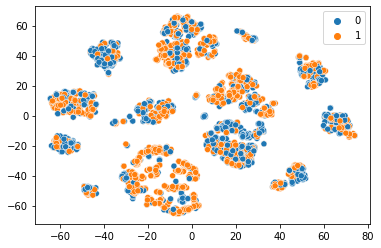

In [7]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE()
Xt = tsne.fit_transform(X)

sns.scatterplot(x=Xt[:,0],y=Xt[:,1],hue=y)

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


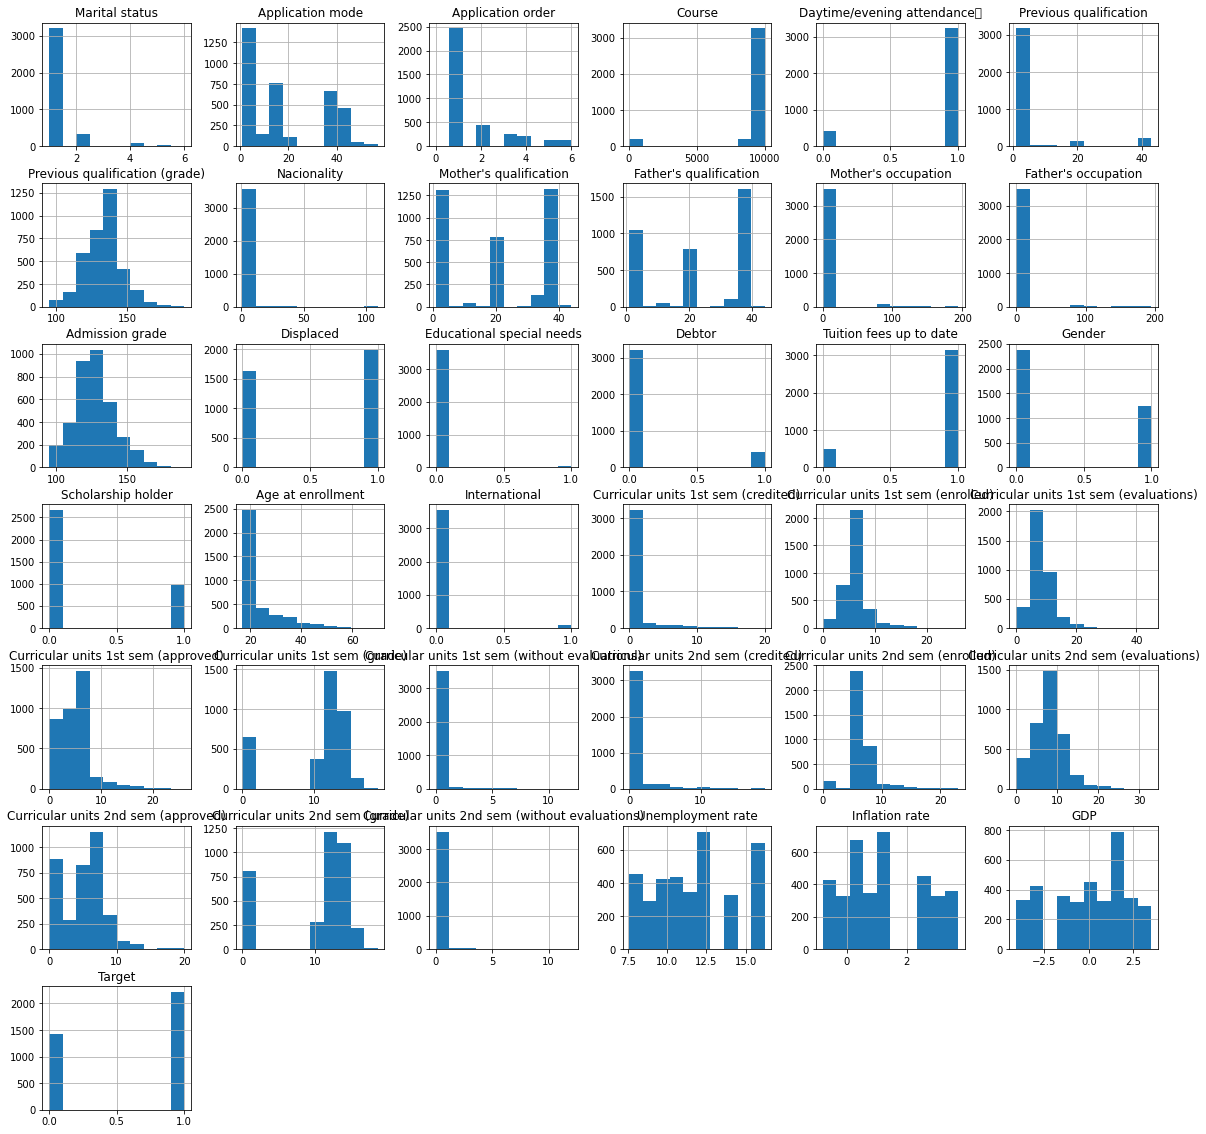

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
_ = dropout.hist()

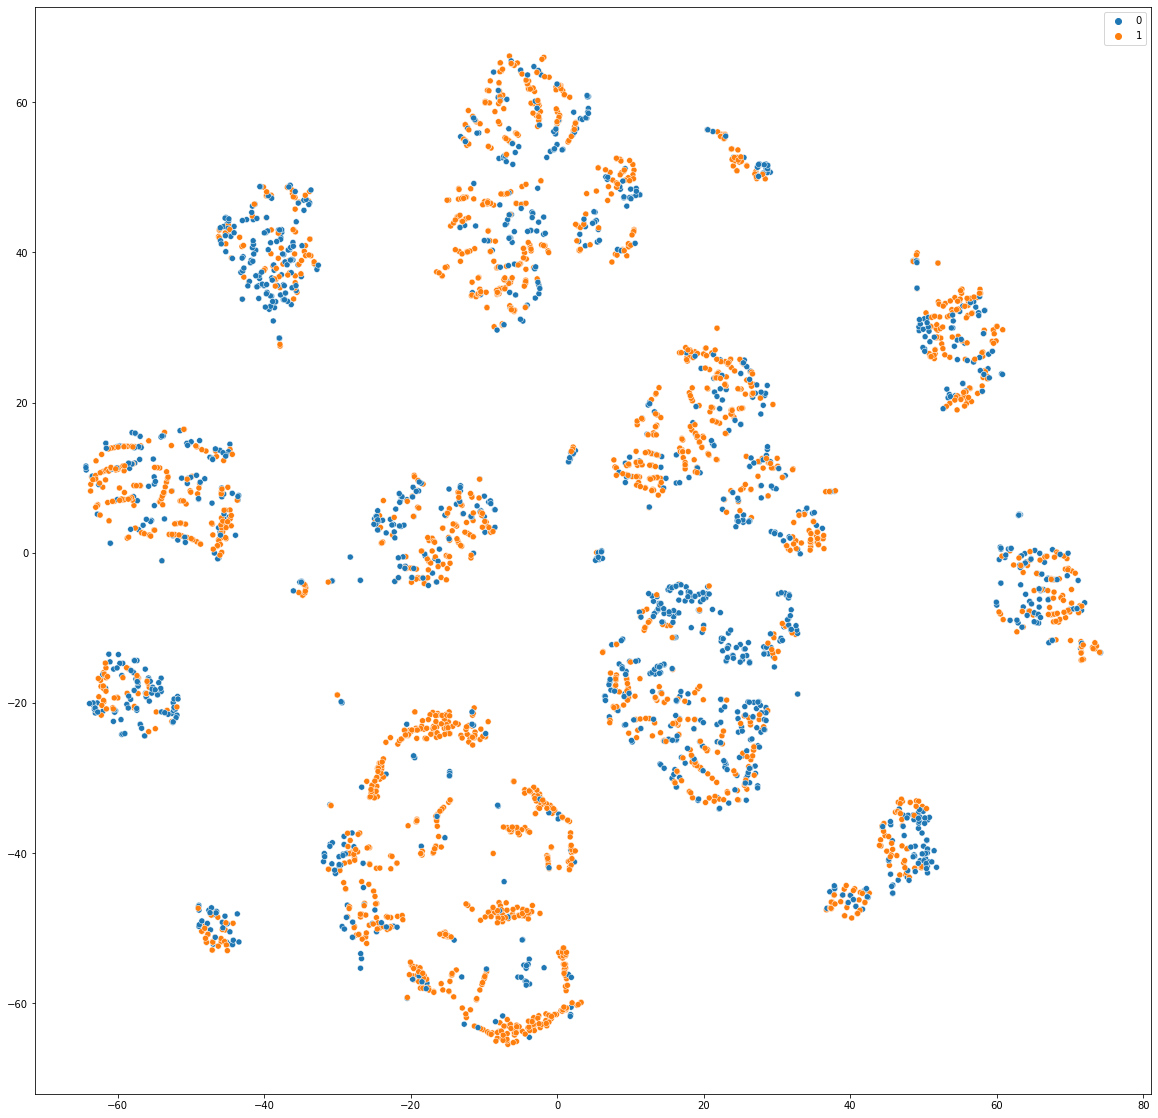

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns
X = dropout[dropout.columns[:-1]].values
y = dropout[dropout.columns[-1]].values
Xp = TSNE().fit_transform(X)
_ = sns.scatterplot(x=Xp[:,0],y=Xp[:,1],hue=y)

In [10]:
from joblib import dump, load
for cls in otimos:
  dump(cls,'{0}.joblib'.format(cls.__class__.__name__))